In [1]:
import sys, os, inspect
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from dataset.Dataset import Dataset
from sklearn.metrics import accuracy_score
import torch
from kan.KAN import KAN
from kan.DropKAN import DropKAN
from kan.DropKANLayer import DropKANLayer
import torch
import torch.nn as nn
import numpy as np
import random
import pandas as pd 

def set_training_mode(module, mode):
    """Set the training mode for a module and all its sub-modules."""
    module.training = mode
    for submodule in module.children():
        set_training_mode(submodule, mode)

In [229]:
from ucimlrepo import fetch_ucirepo 
from sklearn import preprocessing
import torch.nn.functional as F

  
# fetch dataset 
forest_fires =  fetch_ucirepo(id=60) 


  
# data (as pandas dataframes) 
X = forest_fires.data.features 
y = forest_fires.data.targets 
  

# Encode categorical features
le = preprocessing.LabelEncoder()
for col in X.columns:
    if (X[col].dtypes == 'object'):
        list_of_values = list(X[col].unique())
        X[col] = X[col].fillna(X[col].mode().iloc[0])
        le.fit(list_of_values)
        X[col] = le.transform(X[col])

In [230]:
from sklearn.model_selection import train_test_split

# Step 1: Split the data into 60% train and 40% remaining
X_train, X_remaining, y_train, y_remaining = train_test_split(X, y, test_size=0.4, random_state=42)

# Step 2: Split the remaining data into 50% validation and 50% test
X_val, X_test, y_val, y_test = train_test_split(X_remaining, y_remaining, test_size=0.5, random_state=42)


In [231]:
y

,drinks
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
340,12.0
341,12.0
342,15.0
343,16.0


In [232]:
dataset = {}
dataset['train_input'] = torch.from_numpy(X_train.values).float()
dataset['test_input'] = torch.from_numpy(X_test.values).float()
dataset['val_input'] = torch.from_numpy(X_val.values).float()
dataset['train_label'] = torch.from_numpy(y_train.values)
dataset['test_label'] = torch.from_numpy(y_test.values)
dataset['val_label'] = torch.from_numpy(y_val.values)

In [233]:
log_df = pd.DataFrame(columns=[ 'drop_mode', 'validation_accuracy', 'test_accuracy'])


for j in range(10):
    model = KAN(seed=j,width=[X_train.shape[1], 10,1], grid=3, k=3,
                            symbolic_enabled=False)
    results = model.train(dataset, opt="Adam", steps=2000, batch=32, lr=0.01, update_grid=False)
    set_training_mode(model, False)
    

    # Compute MAE
    val_mae = F.l1_loss( model(dataset['val_input']), dataset['val_label']).item()
    
    # Compute MAE
    test_mae = F.l1_loss(model(dataset['test_input']), dataset['test_label']).item()

    log_df.loc[len(log_df)] = ['kan', val_mae, test_mae]
    
    print(0.0, 0.0, 'kan', None, val_mae, test_mae)
    

train loss: 4.72e+00 | test loss: 7.27e+00 | reg: 4.15e+01 :  72%|▋| 1433/2000 [00:12<00:04, 115.89i


KeyboardInterrupt: 

In [120]:
for j in range(10):
    model = DropKAN(seed=j,width=[X_train.shape[1], 10, 1], grid=3, k=3,
                            symbolic_enabled=False, drop_rate=[0.3, 0.3], drop_mode='postspline', drop_scale=False, neuron_fun=['sum', 'sum'])
    results = model.train(dataset, opt="Adam", steps=2000, batch=32, lr=0.01, update_grid=False, loss_fn=F.l1_loss)
    set_training_mode(model, False)
    

    # Compute MAE
    val_mae = F.l1_loss( model(dataset['val_input']), dataset['val_label']).item()
    
    # Compute MAE
    test_mae = F.l1_loss(model(dataset['test_input']), dataset['test_label']).item()

    log_df.loc[len(log_df)] = ['postspline3', val_mae, test_mae]
    
    print(0.0, 0.0, 'postspline', None, val_mae, test_mae)
    

description: 100%|█████████████████████████████████████████████| 2000/2000 [00:12<00:00, 163.54it/s]


0.0 0.0 postspline None 0.600863516330719 0.6141117215156555


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:12<00:00, 163.01it/s]


0.0 0.0 postspline None 0.5770761966705322 0.6050082445144653


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:12<00:00, 164.00it/s]


0.0 0.0 postspline None 0.5952479243278503 0.6401389837265015


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:12<00:00, 162.63it/s]


0.0 0.0 postspline None 0.5689489841461182 0.5987960696220398


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:12<00:00, 162.79it/s]


0.0 0.0 postspline None 0.5939964652061462 0.6148542761802673


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:12<00:00, 162.10it/s]


0.0 0.0 postspline None 0.7401701807975769 0.8054848313331604


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:12<00:00, 163.54it/s]


0.0 0.0 postspline None 0.6336266994476318 0.648411750793457


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:12<00:00, 163.21it/s]


0.0 0.0 postspline None 0.5834296345710754 0.6007277965545654


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:12<00:00, 160.56it/s]


0.0 0.0 postspline None 0.7552220821380615 0.7430824041366577


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:12<00:00, 159.58it/s]

0.0 0.0 postspline None 0.6078576445579529 0.6266030669212341


In [122]:
log_df[log_df['drop_mode']=='kan']['test_accuracy'].median(), log_df[log_df['drop_mode']=='postspline3']['test_accuracy'].median()

(0.6175516247749329, 0.6207286715507507)

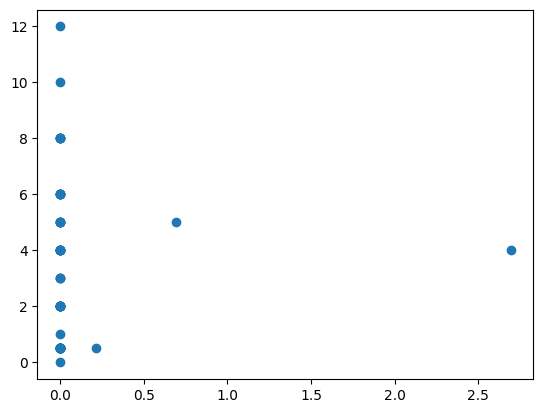

In [247]:
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
torch.set_printoptions(sci_mode=False)



pred = model(dataset['val_input']).detach().numpy().flatten()

plt.scatter(pred, dataset['val_label'].flatten())
#plt.xlim(0, 10)
#plt.ylim(0, 10)

In [249]:
pred

array([ 0.69175094,  0.        ,  0.        , -0.        , -0.00000408,
        0.        ,  0.        , -0.00000038,  0.        ,  0.        ,
       -0.        ,  2.6933715 ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        ,  0.        ,  0.        ,  0.        , -0.00006075,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        , -0.        ,
       -0.00000001, -0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.2140775 ,
       -0.        , -0.        ,  0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        ], dtyp

In [248]:
dataset['val_label'].flatten()

tensor([ 5.0000,  0.5000,  4.0000,  0.5000,  8.0000,  2.0000,  2.0000,  0.5000,
         0.5000,  0.5000, 12.0000,  4.0000,  3.0000,  4.0000,  0.5000,  0.5000,
         0.0000,  6.0000,  4.0000,  6.0000,  5.0000,  0.5000,  0.5000,  0.5000,
         2.0000,  6.0000,  0.5000,  0.5000,  4.0000,  3.0000,  2.0000,  0.5000,
         2.0000, 10.0000,  8.0000,  0.5000,  0.5000,  0.5000,  3.0000,  5.0000,
         8.0000,  5.0000,  0.5000,  4.0000,  2.0000,  0.5000,  0.5000,  0.5000,
         6.0000,  6.0000,  2.0000,  6.0000,  2.0000,  0.5000,  0.5000,  0.5000,
         2.0000,  2.0000,  1.0000,  0.5000,  8.0000,  8.0000,  0.5000,  5.0000,
         0.5000,  4.0000,  5.0000,  4.0000,  4.0000], dtype=torch.float64)

In [87]:
pred

array([6.004398 , 5.2638116, 6.0182595, ..., 5.297915 , 5.096303 ,
       5.407409 ], dtype=float32)

In [234]:
log_folder =  'regression\\'

# Log file name
log_file =  log_folder+forest_fires.metadata['name']+'_log.xlsx'

# DataFrame to store logs
log_df = pd.DataFrame(columns=['drop_rate1', 'drop_rate2', 'drop_mode', 'scale', 'validation_accuracy', 'test_accuracy'])

for j in range(5):
                model = KAN(seed=j,width=[X_train.shape[1], 10,1], grid=3, k=3,
                            symbolic_enabled=False)
                results = model.train(dataset, opt="Adam", steps=2000, batch=32, lr=0.01, update_grid=False)
                set_training_mode(model, False)
                
            
                # Compute MAE
                val_mae = F.l1_loss( model(dataset['val_input']), dataset['val_label']).item()
                
                # Compute MAE
                test_mae = F.l1_loss(model(dataset['test_input']), dataset['test_label']).item()

            
            
            
            
                
                new_row = [0.0,0.0,'kan',None,val_mae,test_mae]
                
                log_df.loc[len(log_df)] = new_row


best = 0
for _ in range(10):  # Number of random configurations to test
    random.seed()
    drop_rate1 = random.uniform(0, .5)
    drop_rate2 = random.uniform(0, .5)

    for drop_mode in ['postspline', 'postact', 'dropout']:

        for scale in  [True, False]:
            print(drop_rate1, drop_rate2, drop_mode)
            
            
            
            for j in range(5):
                model = DropKAN(seed=j,width=[X_train.shape[1], 10, 1], grid=3, k=3,
                                        symbolic_enabled=False, drop_rate=[drop_rate1, drop_rate2], drop_mode=drop_mode, drop_scale=scale, neuron_fun=['sum', 'sum'])
                results = model.train(dataset, opt="Adam", steps=2000, batch=32, lr=0.01, update_grid=False)
                set_training_mode(model, False)
                
            
                # Compute MAE
                val_mae = F.l1_loss( model(dataset['val_input']), dataset['val_label']).item()
                
                # Compute MAE
                test_mae = F.l1_loss(model(dataset['test_input']), dataset['test_label']).item()

            
            
            
            
                
                new_row = [drop_rate1,drop_rate2,drop_mode,scale,val_mae,test_mae]
                
                log_df.loc[len(log_df)] = new_row
            
                # Save the DataFrame to an Excel file
                log_df.to_excel(log_file, index=False)
                print(new_row)
                print(len(log_df))
                print()

print(f"Log saved to {log_file}")

train loss: 3.73e+00 | test loss: 6.88e+00 | reg: 4.15e+01 : 100%|█| 2000/2000 [00:17<00:00, 114.04i
train loss: 5.40e+00 | test loss: 5.09e+00 | reg: 4.44e+01 : 100%|█| 2000/2000 [00:17<00:00, 113.34i
train loss: 4.02e+00 | test loss: 3.39e+00 | reg: 4.21e+01 : 100%|█| 2000/2000 [00:17<00:00, 113.80i
train loss: 2.94e+00 | test loss: 5.25e+00 | reg: 3.66e+01 : 100%|█| 2000/2000 [00:17<00:00, 112.00i
train loss: 5.22e+00 | test loss: 5.00e+00 | reg: 4.20e+01 : 100%|█| 2000/2000 [00:17<00:00, 115.47i


0.35892126058363105 0.4045590938488854 postspline


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:12<00:00, 159.38it/s]


[0.35892126058363105, 0.4045590938488854, 'postspline', True, 2.7437059677857065, 3.593751876813522]
6



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:12<00:00, 159.56it/s]


[0.35892126058363105, 0.4045590938488854, 'postspline', True, 2.999999999999883, 3.7232113149072035]
7



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:12<00:00, 161.01it/s]


[0.35892126058363105, 0.4045590938488854, 'postspline', True, 2.4170019773469456, 2.703918393107428]
8



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:12<00:00, 160.79it/s]


[0.35892126058363105, 0.4045590938488854, 'postspline', True, 2.1965029187824414, 2.9043465092562246]
9



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:12<00:00, 166.03it/s]


[0.35892126058363105, 0.4045590938488854, 'postspline', True, 2.999961761203442, 3.6754322830113706]
10

0.35892126058363105 0.4045590938488854 postspline


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:12<00:00, 165.21it/s]


[0.35892126058363105, 0.4045590938488854, 'postspline', False, 2.8151319403554522, 3.670588887037693]
11



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 168.23it/s]


[0.35892126058363105, 0.4045590938488854, 'postspline', False, 2.999999999999878, 3.718299628633685]
12



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 169.72it/s]


[0.35892126058363105, 0.4045590938488854, 'postspline', False, 2.4801158939582715, 2.714272037796352]
13



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 170.82it/s]


[0.35892126058363105, 0.4045590938488854, 'postspline', False, 2.2007332193678706, 2.8937918431517007]
14



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 170.53it/s]


[0.35892126058363105, 0.4045590938488854, 'postspline', False, 2.999966998463674, 3.675432599757257]
15

0.35892126058363105 0.4045590938488854 postact


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 169.44it/s]


[0.35892126058363105, 0.4045590938488854, 'postact', True, 2.802724647871973, 3.3471601369918025]
16



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 169.87it/s]


[0.35892126058363105, 0.4045590938488854, 'postact', True, 2.1926622857218203, 2.6970973705899888]
17



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 169.49it/s]


[0.35892126058363105, 0.4045590938488854, 'postact', True, 2.2617785567822666, 2.69953982035319]
18



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 169.31it/s]


[0.35892126058363105, 0.4045590938488854, 'postact', True, 2.3455910695635755, 2.8227221119231074]
19



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 171.12it/s]


[0.35892126058363105, 0.4045590938488854, 'postact', True, 2.2475274006525674, 2.5958335537841353]
20

0.35892126058363105 0.4045590938488854 postact


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 169.55it/s]


[0.35892126058363105, 0.4045590938488854, 'postact', False, 2.260028550590294, 2.6962404531845148]
21



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:12<00:00, 165.77it/s]


[0.35892126058363105, 0.4045590938488854, 'postact', False, 2.713083750959756, 3.5267812100009643]
22



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 170.16it/s]


[0.35892126058363105, 0.4045590938488854, 'postact', False, 4.784979640573695, 4.78386578352555]
23



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 171.72it/s]


[0.35892126058363105, 0.4045590938488854, 'postact', False, 2.4417173136835513, 2.7995856844860576]
24



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.17it/s]


[0.35892126058363105, 0.4045590938488854, 'postact', False, 2.6561232546101445, 2.9226418647213257]
25

0.35892126058363105 0.4045590938488854 dropout


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 202.72it/s]


[0.35892126058363105, 0.4045590938488854, 'dropout', True, 2.935956876349004, 3.3904806780261]
26



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 203.37it/s]


[0.35892126058363105, 0.4045590938488854, 'dropout', True, 2.3383059881735537, 2.78242825511573]
27



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 205.21it/s]


[0.35892126058363105, 0.4045590938488854, 'dropout', True, 2.747788774804476, 3.2488403018419936]
28



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 205.78it/s]


[0.35892126058363105, 0.4045590938488854, 'dropout', True, 2.4070174955371497, 2.9079112721526106]
29



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 203.76it/s]


[0.35892126058363105, 0.4045590938488854, 'dropout', True, 2.999999999999947, 3.550724637681157]
30

0.35892126058363105 0.4045590938488854 dropout


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 204.74it/s]


[0.35892126058363105, 0.4045590938488854, 'dropout', False, 2.71447476559212, 3.1759335103551156]
31



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:10<00:00, 199.61it/s]


[0.35892126058363105, 0.4045590938488854, 'dropout', False, 2.4047642324281777, 2.6437757187995357]
32



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:10<00:00, 196.47it/s]


[0.35892126058363105, 0.4045590938488854, 'dropout', False, 2.3880376712135645, 2.630001817924389]
33



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 202.70it/s]


[0.35892126058363105, 0.4045590938488854, 'dropout', False, 2.101030701312466, 2.5714626882387246]
34



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 207.54it/s]


[0.35892126058363105, 0.4045590938488854, 'dropout', False, 2.9999999999990394, 3.5567523638407]
35

0.05056080994829343 0.10878128424775307 postspline


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 173.16it/s]


[0.05056080994829343, 0.10878128424775307, 'postspline', True, 2.7283413242534444, 3.5407852842826006]
36



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 173.51it/s]


[0.05056080994829343, 0.10878128424775307, 'postspline', True, 2.99999999999987, 3.7487035382874083]
37



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 173.25it/s]


[0.05056080994829343, 0.10878128424775307, 'postspline', True, 2.415500275466753, 2.714221639909606]
38



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 173.66it/s]


[0.05056080994829343, 0.10878128424775307, 'postspline', True, 2.203499944313713, 2.9113254892653315]
39



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 173.34it/s]


[0.05056080994829343, 0.10878128424775307, 'postspline', True, 2.999927328846149, 3.6754277478208093]
40

0.05056080994829343 0.10878128424775307 postspline


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 174.73it/s]


[0.05056080994829343, 0.10878128424775307, 'postspline', False, 2.810797111601866, 3.6641784300627718]
41



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.53it/s]


[0.05056080994829343, 0.10878128424775307, 'postspline', False, 2.99999999999987, 3.7134724732230375]
42



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.05it/s]


[0.05056080994829343, 0.10878128424775307, 'postspline', False, 2.4192781405172488, 2.7072684350221055]
43



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.46it/s]


[0.05056080994829343, 0.10878128424775307, 'postspline', False, 2.200089770814647, 2.8852456600769707]
44



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.54it/s]


[0.05056080994829343, 0.10878128424775307, 'postspline', False, 2.9999307693146173, 3.675427036330794]
45

0.05056080994829343 0.10878128424775307 postact


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 171.51it/s]


[0.05056080994829343, 0.10878128424775307, 'postact', True, 2.715680531776406, 3.1873220974565593]
46



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.27it/s]


[0.05056080994829343, 0.10878128424775307, 'postact', True, 2.2727489609649214, 2.584315301715464]
47



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.87it/s]


[0.05056080994829343, 0.10878128424775307, 'postact', True, 2.440642061440841, 2.6860790287238965]
48



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.83it/s]


[0.05056080994829343, 0.10878128424775307, 'postact', True, 2.137551667033762, 2.4779646241146587]
49



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 173.09it/s]


[0.05056080994829343, 0.10878128424775307, 'postact', True, 2.9999999999927884, 3.5507246376802954]
50

0.05056080994829343 0.10878128424775307 postact


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 173.37it/s]


[0.05056080994829343, 0.10878128424775307, 'postact', False, 2.7252953815083227, 3.1491089923759725]
51



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 173.27it/s]


[0.05056080994829343, 0.10878128424775307, 'postact', False, 2.3841080942015718, 2.6716444803320845]
52



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 173.54it/s]


[0.05056080994829343, 0.10878128424775307, 'postact', False, 2.5460791518722754, 2.8604871742967246]
53



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 174.18it/s]


[0.05056080994829343, 0.10878128424775307, 'postact', False, 2.219012419382731, 2.499390422434047]
54



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 174.15it/s]


[0.05056080994829343, 0.10878128424775307, 'postact', False, 2.336858123972796, 2.606637274009594]
55

0.05056080994829343 0.10878128424775307 dropout


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 207.87it/s]


[0.05056080994829343, 0.10878128424775307, 'dropout', True, 2.311599499937417, 2.5780711329501607]
56



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 207.64it/s]


[0.05056080994829343, 0.10878128424775307, 'dropout', True, 2.2450105012327, 2.597500422726507]
57



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 210.58it/s]


[0.05056080994829343, 0.10878128424775307, 'dropout', True, 2.332137918126756, 2.6401906652726987]
58



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 207.48it/s]


[0.05056080994829343, 0.10878128424775307, 'dropout', True, 2.1157038064970486, 2.5021389239076255]
59



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 208.33it/s]


[0.05056080994829343, 0.10878128424775307, 'dropout', True, 2.999999924098481, 3.550724633070174]
60

0.05056080994829343 0.10878128424775307 dropout


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 205.83it/s]


[0.05056080994829343, 0.10878128424775307, 'dropout', False, 2.7569663362012333, 3.1552704522464268]
61



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 208.44it/s]


[0.05056080994829343, 0.10878128424775307, 'dropout', False, 2.340411773626355, 2.669484556585118]
62



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 209.97it/s]


[0.05056080994829343, 0.10878128424775307, 'dropout', False, 2.4813368959703306, 2.8098408553911294]
63



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 208.55it/s]


[0.05056080994829343, 0.10878128424775307, 'dropout', False, 2.152943133444026, 2.634411853292714]
64



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 209.17it/s]


[0.05056080994829343, 0.10878128424775307, 'dropout', False, 2.99999989690983, 3.550724631607713]
65

0.017878398687375396 0.028126029181731682 postspline


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 173.08it/s]


[0.017878398687375396, 0.028126029181731682, 'postspline', True, 2.747897202304597, 3.710828692432759]
66



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 173.06it/s]


[0.017878398687375396, 0.028126029181731682, 'postspline', True, 2.9999999999998668, 3.723769031630116]
67



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 173.36it/s]


[0.017878398687375396, 0.028126029181731682, 'postspline', True, 2.446269531180893, 2.7320650798687036]
68



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 170.52it/s]


[0.017878398687375396, 0.028126029181731682, 'postspline', True, 2.1889345265816953, 2.848143762436466]
69



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.80it/s]


[0.017878398687375396, 0.028126029181731682, 'postspline', True, 2.999926263866722, 3.6754266204976767]
70

0.017878398687375396 0.028126029181731682 postspline


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 174.64it/s]


[0.017878398687375396, 0.028126029181731682, 'postspline', False, 2.7690537498370147, 3.690415725880589]
71



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.26it/s]


[0.017878398687375396, 0.028126029181731682, 'postspline', False, 2.9999999999998663, 3.734624029096319]
72



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.20it/s]


[0.017878398687375396, 0.028126029181731682, 'postspline', False, 2.507295734640481, 2.791277830151544]
73



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 171.54it/s]


[0.017878398687375396, 0.028126029181731682, 'postspline', False, 2.2043632597163105, 2.8840416980826338]
74



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.55it/s]


[0.017878398687375396, 0.028126029181731682, 'postspline', False, 2.9999266001617064, 3.6754266522693646]
75

0.017878398687375396 0.028126029181731682 postact


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.91it/s]


[0.017878398687375396, 0.028126029181731682, 'postact', True, 2.708550918956952, 3.1504253763845202]
76



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.48it/s]


[0.017878398687375396, 0.028126029181731682, 'postact', True, 2.315594540126082, 2.624657905620077]
77



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.39it/s]


[0.017878398687375396, 0.028126029181731682, 'postact', True, 2.395587126413981, 2.5854525047799815]
78



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.42it/s]


[0.017878398687375396, 0.028126029181731682, 'postact', True, 2.1888359042181484, 2.718080085256825]
79



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.44it/s]


[0.017878398687375396, 0.028126029181731682, 'postact', True, 2.999999988905636, 3.5507246365208394]
80

0.017878398687375396 0.028126029181731682 postact


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 174.22it/s]


[0.017878398687375396, 0.028126029181731682, 'postact', False, 2.705380758695908, 3.1795054230761317]
81



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 174.02it/s]


[0.017878398687375396, 0.028126029181731682, 'postact', False, 2.3423652337945025, 2.6620442279870957]
82



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 174.29it/s]


[0.017878398687375396, 0.028126029181731682, 'postact', False, 2.4907194842462954, 2.7873845860578013]
83



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 174.39it/s]


[0.017878398687375396, 0.028126029181731682, 'postact', False, 2.2186258841251982, 2.715906291768171]
84



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 173.79it/s]


[0.017878398687375396, 0.028126029181731682, 'postact', False, 2.99999998886376, 3.5507246365147704]
85

0.017878398687375396 0.028126029181731682 dropout


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 208.61it/s]


[0.017878398687375396, 0.028126029181731682, 'dropout', True, 2.8594647054169426, 2.929918587255238]
86



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 207.20it/s]


[0.017878398687375396, 0.028126029181731682, 'dropout', True, 2.2905526506728022, 2.624604232069375]
87



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 207.77it/s]


[0.017878398687375396, 0.028126029181731682, 'dropout', True, 2.4267855001532515, 2.7087207376093105]
88



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 210.30it/s]


[0.017878398687375396, 0.028126029181731682, 'dropout', True, 2.184859844221585, 2.6732979546422544]
89



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 208.57it/s]


[0.017878398687375396, 0.028126029181731682, 'dropout', True, 2.999969838310907, 3.550723651106514]
90

0.017878398687375396 0.028126029181731682 dropout


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 211.66it/s]


[0.017878398687375396, 0.028126029181731682, 'dropout', False, 2.784362845761323, 2.9827220816180584]
91



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 207.91it/s]


[0.017878398687375396, 0.028126029181731682, 'dropout', False, 2.323515122351439, 2.670488979505456]
92



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 208.57it/s]


[0.017878398687375396, 0.028126029181731682, 'dropout', False, 2.4604613608208257, 2.780094533726789]
93



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 210.22it/s]


[0.017878398687375396, 0.028126029181731682, 'dropout', False, 2.2107908743015234, 2.5927150957826255]
94



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 211.11it/s]


[0.017878398687375396, 0.028126029181731682, 'dropout', False, 2.999968970908671, 3.5507236329906697]
95

0.13519667534580904 0.4556222990956101 postspline


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 173.42it/s]


[0.13519667534580904, 0.4556222990956101, 'postspline', True, 2.664691741959549, 3.5542967941621395]
96



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 173.23it/s]


[0.13519667534580904, 0.4556222990956101, 'postspline', True, 2.999999999999884, 3.740324793402469]
97



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 173.04it/s]


[0.13519667534580904, 0.4556222990956101, 'postspline', True, 2.437231135541114, 2.636391788289167]
98



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 173.35it/s]


[0.13519667534580904, 0.4556222990956101, 'postspline', True, 2.205409868903782, 2.874809009441431]
99



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.03it/s]


[0.13519667534580904, 0.4556222990956101, 'postspline', True, 2.999966816682176, 3.6754325178484093]
100

0.13519667534580904 0.4556222990956101 postspline


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 174.90it/s]


[0.13519667534580904, 0.4556222990956101, 'postspline', False, 2.7974899272616, 3.635574568098797]
101



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.70it/s]


[0.13519667534580904, 0.4556222990956101, 'postspline', False, 2.999999999999878, 3.758314213493044]
102



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 171.45it/s]


[0.13519667534580904, 0.4556222990956101, 'postspline', False, 2.4589584288389785, 2.7560713515765425]
103



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 169.51it/s]


[0.13519667534580904, 0.4556222990956101, 'postspline', False, 2.200449039970619, 2.8812073901079702]
104



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.26it/s]


[0.13519667534580904, 0.4556222990956101, 'postspline', False, 2.999970796056746, 3.675432754819494]
105

0.13519667534580904 0.4556222990956101 postact


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 171.85it/s]


[0.13519667534580904, 0.4556222990956101, 'postact', True, 2.8352700980404806, 3.2818467744637223]
106



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.14it/s]


[0.13519667534580904, 0.4556222990956101, 'postact', True, 2.1720667662827866, 2.638481965963391]
107



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.26it/s]


[0.13519667534580904, 0.4556222990956101, 'postact', True, 2.2002453406651816, 2.5108878457027934]
108



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.72it/s]


[0.13519667534580904, 0.4556222990956101, 'postact', True, 2.245609705430874, 2.7256551531777866]
109



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 173.02it/s]


[0.13519667534580904, 0.4556222990956101, 'postact', True, 2.999999999999998, 3.550724637681159]
110

0.13519667534580904 0.4556222990956101 postact


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 174.29it/s]


[0.13519667534580904, 0.4556222990956101, 'postact', False, 2.394780471285745, 2.8213621846842547]
111



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 173.92it/s]


[0.13519667534580904, 0.4556222990956101, 'postact', False, 2.49899194897085, 2.8082829869311787]
112



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 173.85it/s]


[0.13519667534580904, 0.4556222990956101, 'postact', False, 3.2740477029828057, 3.788719947787299]
113



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 174.29it/s]


[0.13519667534580904, 0.4556222990956101, 'postact', False, 2.2218873276226763, 2.7122831206390825]
114



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 174.09it/s]


[0.13519667534580904, 0.4556222990956101, 'postact', False, 2.1196273237034893, 2.6164488170457925]
115

0.13519667534580904 0.4556222990956101 dropout


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 208.31it/s]


[0.13519667534580904, 0.4556222990956101, 'dropout', True, 2.886945692606401, 3.3859271622475404]
116



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 208.55it/s]


[0.13519667534580904, 0.4556222990956101, 'dropout', True, 2.190534746301347, 2.6076546700104424]
117



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 208.48it/s]


[0.13519667534580904, 0.4556222990956101, 'dropout', True, 2.902333112819053, 3.4360657770713727]
118



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 208.43it/s]


[0.13519667534580904, 0.4556222990956101, 'dropout', True, 2.3720735514509506, 2.8963074476822563]
119



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 208.46it/s]


[0.13519667534580904, 0.4556222990956101, 'dropout', True, 2.999999999894348, 3.5507246376735146]
120

0.13519667534580904 0.4556222990956101 dropout


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 209.77it/s]


[0.13519667534580904, 0.4556222990956101, 'dropout', False, 2.7924118744507704, 3.2384471615452184]
121



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 208.47it/s]


[0.13519667534580904, 0.4556222990956101, 'dropout', False, 2.403448034023893, 2.6767301421234575]
122



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 210.50it/s]


[0.13519667534580904, 0.4556222990956101, 'dropout', False, 2.3172705881837485, 2.70228101723436]
123



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 208.55it/s]


[0.13519667534580904, 0.4556222990956101, 'dropout', False, 2.1060380469197812, 2.613587949586951]
124



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 209.85it/s]


[0.13519667534580904, 0.4556222990956101, 'dropout', False, 2.9999999996723905, 3.550724637658389]
125

0.47197903108929795 0.34220721076243843 postspline


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 173.38it/s]


[0.47197903108929795, 0.34220721076243843, 'postspline', True, 2.711650425651643, 3.594862044439682]
126



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.97it/s]


[0.47197903108929795, 0.34220721076243843, 'postspline', True, 2.9999999999998823, 3.7655991802866096]
127



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 173.37it/s]


[0.47197903108929795, 0.34220721076243843, 'postspline', True, 2.4160179107085518, 2.715398529301519]
128



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 173.45it/s]


[0.47197903108929795, 0.34220721076243843, 'postspline', True, 2.1962092752042026, 2.9059633863145025]
129



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.72it/s]


[0.47197903108929795, 0.34220721076243843, 'postspline', True, 2.9999562490315093, 3.6754320344932503]
130

0.47197903108929795 0.34220721076243843 postspline


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 174.68it/s]


[0.47197903108929795, 0.34220721076243843, 'postspline', False, 2.733763456311302, 3.57370251286915]
131



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.88it/s]


[0.47197903108929795, 0.34220721076243843, 'postspline', False, 2.999999999999878, 3.7576388738635074]
132



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.25it/s]


[0.47197903108929795, 0.34220721076243843, 'postspline', False, 2.415360043878141, 2.665732902029286]
133



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.67it/s]


[0.47197903108929795, 0.34220721076243843, 'postspline', False, 2.1990528089412744, 2.8881396659906358]
134



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.40it/s]


[0.47197903108929795, 0.34220721076243843, 'postspline', False, 2.9999624633931794, 3.67543240261997]
135

0.47197903108929795 0.34220721076243843 postact


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.64it/s]


[0.47197903108929795, 0.34220721076243843, 'postact', True, 2.8722122990209535, 3.368871470274553]
136



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.80it/s]


[0.47197903108929795, 0.34220721076243843, 'postact', True, 2.2749012017595596, 2.7324205947958906]
137



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.91it/s]


[0.47197903108929795, 0.34220721076243843, 'postact', True, 2.2500622790792715, 2.697922063910443]
138



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.68it/s]


[0.47197903108929795, 0.34220721076243843, 'postact', True, 2.404945136844248, 2.915976697983949]
139



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.92it/s]


[0.47197903108929795, 0.34220721076243843, 'postact', True, 2.1533440921617593, 2.615383396977964]
140

0.47197903108929795 0.34220721076243843 postact


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 174.22it/s]


[0.47197903108929795, 0.34220721076243843, 'postact', False, 2.849986513455709, 3.1397076102270596]
141



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 174.28it/s]


[0.47197903108929795, 0.34220721076243843, 'postact', False, 2.3073465098505435, 2.8410620032877163]
142



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 173.64it/s]


[0.47197903108929795, 0.34220721076243843, 'postact', False, 3.8480959145919136, 3.982306466586348]
143



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 174.40it/s]


[0.47197903108929795, 0.34220721076243843, 'postact', False, 2.0687764554783916, 2.5823449207388838]
144



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 174.19it/s]


[0.47197903108929795, 0.34220721076243843, 'postact', False, 2.2826327983883843, 2.7229852140813633]
145

0.47197903108929795 0.34220721076243843 dropout


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 206.88it/s]


[0.47197903108929795, 0.34220721076243843, 'dropout', True, 2.863996109559635, 3.34527518267316]
146



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 209.02it/s]


[0.47197903108929795, 0.34220721076243843, 'dropout', True, 2.4592324167058086, 2.9482706469902094]
147



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 206.76it/s]


[0.47197903108929795, 0.34220721076243843, 'dropout', True, 2.2136534677035566, 2.66370583789936]
148



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 204.46it/s]


[0.47197903108929795, 0.34220721076243843, 'dropout', True, 2.4560665884527606, 2.961889828028886]
149



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 207.90it/s]


[0.47197903108929795, 0.34220721076243843, 'dropout', True, 2.999999999999999, 3.550724637681159]
150

0.47197903108929795 0.34220721076243843 dropout


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 210.86it/s]


[0.47197903108929795, 0.34220721076243843, 'dropout', False, 2.5411900679270425, 2.882325697636259]
151



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 208.79it/s]


[0.47197903108929795, 0.34220721076243843, 'dropout', False, 2.2956601277641626, 2.576808405959088]
152



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 208.21it/s]


[0.47197903108929795, 0.34220721076243843, 'dropout', False, 2.3258771015250166, 2.642941443816475]
153



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:10<00:00, 197.88it/s]


[0.47197903108929795, 0.34220721076243843, 'dropout', False, 2.241941804471223, 2.522768436998561]
154



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 205.81it/s]


[0.47197903108929795, 0.34220721076243843, 'dropout', False, 2.9999999999999725, 3.5434988581615925]
155

0.4730154943607337 0.4996780628070253 postspline


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:12<00:00, 163.71it/s]


[0.4730154943607337, 0.4996780628070253, 'postspline', True, 2.6855376945989, 3.5547124967416104]
156



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.06it/s]


[0.4730154943607337, 0.4996780628070253, 'postspline', True, 2.9999999999998854, 3.750286889342008]
157



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 170.88it/s]


[0.4730154943607337, 0.4996780628070253, 'postspline', True, 2.4162704780481863, 2.703155163405598]
158



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 171.95it/s]


[0.4730154943607337, 0.4996780628070253, 'postspline', True, 2.1964403079903643, 2.882236097169959]
159



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 171.95it/s]


[0.4730154943607337, 0.4996780628070253, 'postspline', True, 2.9999699011989476, 3.6754326790873364]
160

0.4730154943607337 0.4996780628070253 postspline


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.02it/s]


[0.4730154943607337, 0.4996780628070253, 'postspline', False, 2.3475233803245565, 3.3902867935633103]
161



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:12<00:00, 165.45it/s]


[0.4730154943607337, 0.4996780628070253, 'postspline', False, 2.999999999999878, 3.730682453849343]
162



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 169.38it/s]


[0.4730154943607337, 0.4996780628070253, 'postspline', False, 2.318525300509688, 2.620459765627764]
163



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:12<00:00, 164.66it/s]


[0.4730154943607337, 0.4996780628070253, 'postspline', False, 2.1972364653711733, 2.8977427689925483]
164



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 168.12it/s]


[0.4730154943607337, 0.4996780628070253, 'postspline', False, 2.9999735112923274, 3.675432862744618]
165

0.4730154943607337 0.4996780628070253 postact


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 169.55it/s]


[0.4730154943607337, 0.4996780628070253, 'postact', True, 2.931514319742238, 3.44002239076008]
166



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 171.33it/s]


[0.4730154943607337, 0.4996780628070253, 'postact', True, 2.3382219577181167, 2.809885625390039]
167



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.17it/s]


[0.4730154943607337, 0.4996780628070253, 'postact', True, 2.7605085270271044, 3.2669646850855854]
168



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.28it/s]


[0.4730154943607337, 0.4996780628070253, 'postact', True, 2.527443743918253, 3.034701291633689]
169



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:12<00:00, 163.36it/s]


[0.4730154943607337, 0.4996780628070253, 'postact', True, 2.168137092521225, 2.646875265715779]
170

0.4730154943607337 0.4996780628070253 postact


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 173.68it/s]


[0.4730154943607337, 0.4996780628070253, 'postact', False, 2.6644897599151167, 3.0679715042528897]
171



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 173.61it/s]


[0.4730154943607337, 0.4996780628070253, 'postact', False, 3.4853940355604975, 4.167821251827737]
172



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 173.80it/s]


[0.4730154943607337, 0.4996780628070253, 'postact', False, 5.957434440004652, 5.924924732982248]
173



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 173.32it/s]


[0.4730154943607337, 0.4996780628070253, 'postact', False, 2.848926409431126, 3.2354345528975776]
174



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 173.79it/s]


[0.4730154943607337, 0.4996780628070253, 'postact', False, 2.3420896651088325, 2.6811553930890732]
175

0.4730154943607337 0.4996780628070253 dropout


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 208.07it/s]


[0.4730154943607337, 0.4996780628070253, 'dropout', True, 2.8885057202940447, 3.3950601641609466]
176



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 207.56it/s]


[0.4730154943607337, 0.4996780628070253, 'dropout', True, 2.9980317015404103, 3.518181913776717]
177



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 208.56it/s]


[0.4730154943607337, 0.4996780628070253, 'dropout', True, 2.729508630226664, 3.1711825522175734]
178



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 207.86it/s]


[0.4730154943607337, 0.4996780628070253, 'dropout', True, 2.4784085156692974, 2.978845104791116]
179



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 206.96it/s]


[0.4730154943607337, 0.4996780628070253, 'dropout', True, 2.9999999999999996, 3.550724637681159]
180

0.4730154943607337 0.4996780628070253 dropout


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 209.51it/s]


[0.4730154943607337, 0.4996780628070253, 'dropout', False, 2.7342013786442867, 3.213355596582981]
181



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 208.43it/s]


[0.4730154943607337, 0.4996780628070253, 'dropout', False, 2.528478447785865, 3.0777294918212728]
182



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 208.16it/s]


[0.4730154943607337, 0.4996780628070253, 'dropout', False, 2.5193864124408667, 2.780551229698071]
183



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 208.67it/s]


[0.4730154943607337, 0.4996780628070253, 'dropout', False, 2.1656890407852503, 2.681498028229976]
184



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 206.56it/s]


[0.4730154943607337, 0.4996780628070253, 'dropout', False, 2.999999999999973, 3.5401159058446448]
185

0.47672632312442165 0.04833878241837136 postspline


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.32it/s]


[0.47672632312442165, 0.04833878241837136, 'postspline', True, 2.7724703905269417, 3.5796230563345666]
186



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.36it/s]


[0.47672632312442165, 0.04833878241837136, 'postspline', True, 2.99999999999987, 3.716353260729477]
187



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.81it/s]


[0.47672632312442165, 0.04833878241837136, 'postspline', True, 2.4271329883216084, 2.6634971767232036]
188



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.63it/s]


[0.47672632312442165, 0.04833878241837136, 'postspline', True, 2.20610613408296, 2.8383225185283716]
189



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 171.14it/s]


[0.47672632312442165, 0.04833878241837136, 'postspline', True, 2.999926425540241, 3.6754266470831816]
190

0.47672632312442165 0.04833878241837136 postspline


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 173.59it/s]


[0.47672632312442165, 0.04833878241837136, 'postspline', False, 2.889794876717449, 3.87475313706105]
191



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.18it/s]


[0.47672632312442165, 0.04833878241837136, 'postspline', False, 2.99999999999987, 3.6293699808197277]
192



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.20it/s]


[0.47672632312442165, 0.04833878241837136, 'postspline', False, 2.4174142799515654, 2.7126741737559223]
193



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.15it/s]


[0.47672632312442165, 0.04833878241837136, 'postspline', False, 2.204335008842358, 2.84541736651158]
194



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 171.77it/s]


[0.47672632312442165, 0.04833878241837136, 'postspline', False, 2.99992703358511, 3.6754267018858284]
195

0.47672632312442165 0.04833878241837136 postact


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 171.92it/s]


[0.47672632312442165, 0.04833878241837136, 'postact', True, 2.8114988194060446, 3.333383238249681]
196



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 170.48it/s]


[0.47672632312442165, 0.04833878241837136, 'postact', True, 2.1746771940286607, 2.544002570967743]
197



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.14it/s]


[0.47672632312442165, 0.04833878241837136, 'postact', True, 2.220905219299206, 2.5083200637845025]
198



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.29it/s]


[0.47672632312442165, 0.04833878241837136, 'postact', True, 2.325223984925643, 2.8047213662361754]
199



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.07it/s]


[0.47672632312442165, 0.04833878241837136, 'postact', True, 2.1695052696310957, 2.553838119990584]
200

0.47672632312442165 0.04833878241837136 postact


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 173.68it/s]


[0.47672632312442165, 0.04833878241837136, 'postact', False, 2.647736293682154, 2.9012556058773096]
201



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 173.51it/s]


[0.47672632312442165, 0.04833878241837136, 'postact', False, 2.8057937967604487, 3.1370502243871274]
202



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 173.94it/s]


[0.47672632312442165, 0.04833878241837136, 'postact', False, 3.501078384509985, 3.705888699794161]
203



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 173.81it/s]


[0.47672632312442165, 0.04833878241837136, 'postact', False, 2.1768833744353144, 2.576998423838961]
204



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 173.89it/s]


[0.47672632312442165, 0.04833878241837136, 'postact', False, 2.5078185675800713, 2.7109495384105737]
205

0.47672632312442165 0.04833878241837136 dropout


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 206.53it/s]


[0.47672632312442165, 0.04833878241837136, 'dropout', True, 2.29255768786306, 2.878469595874565]
206



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 206.48it/s]


[0.47672632312442165, 0.04833878241837136, 'dropout', True, 2.1795645788096, 2.622157825939897]
207



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 207.19it/s]


[0.47672632312442165, 0.04833878241837136, 'dropout', True, 2.2410862895025723, 2.545223959978076]
208



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 207.89it/s]


[0.47672632312442165, 0.04833878241837136, 'dropout', True, 2.2396543837975766, 2.711509913638018]
209



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:10<00:00, 194.60it/s]


[0.47672632312442165, 0.04833878241837136, 'dropout', True, 3.000000000000011, 3.527427141262756]
210

0.47672632312442165 0.04833878241837136 dropout


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:10<00:00, 192.07it/s]


[0.47672632312442165, 0.04833878241837136, 'dropout', False, 2.8142964252527207, 3.1284868924514107]
211



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:10<00:00, 183.93it/s]


[0.47672632312442165, 0.04833878241837136, 'dropout', False, 2.414115624151368, 2.647991719453231]
212



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:10<00:00, 184.60it/s]


[0.47672632312442165, 0.04833878241837136, 'dropout', False, 2.9283911076144897, 3.152769202771394]
213



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:10<00:00, 189.63it/s]


[0.47672632312442165, 0.04833878241837136, 'dropout', False, 2.2827084824658823, 2.59992696236873]
214



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:10<00:00, 198.27it/s]


[0.47672632312442165, 0.04833878241837136, 'dropout', False, 2.316250206767649, 2.549919943878616]
215

0.07810593291522194 0.15524212607847993 postspline


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:12<00:00, 157.85it/s]


[0.07810593291522194, 0.15524212607847993, 'postspline', True, 2.914373919133032, 3.784475638537253]
216



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 170.10it/s]


[0.07810593291522194, 0.15524212607847993, 'postspline', True, 2.9999999999998703, 3.730040629488069]
217



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:12<00:00, 162.10it/s]


[0.07810593291522194, 0.15524212607847993, 'postspline', True, 2.416501573894335, 2.7169462131417315]
218



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:12<00:00, 165.83it/s]


[0.07810593291522194, 0.15524212607847993, 'postspline', True, 2.201398441756981, 2.8804741199465766]
219



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:12<00:00, 165.56it/s]


[0.07810593291522194, 0.15524212607847993, 'postspline', True, 2.9999302336784752, 3.6754266475245827]
220

0.07810593291522194 0.15524212607847993 postspline


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 167.29it/s]


[0.07810593291522194, 0.15524212607847993, 'postspline', False, 2.8244973841602836, 3.732390360792081]
221



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 169.66it/s]


[0.07810593291522194, 0.15524212607847993, 'postspline', False, 2.99999999999987, 3.7370315045019105]
222



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 170.56it/s]


[0.07810593291522194, 0.15524212607847993, 'postspline', False, 2.4367728017378543, 2.6872200274813003]
223



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 170.11it/s]


[0.07810593291522194, 0.15524212607847993, 'postspline', False, 2.1930720702461572, 2.8603100638458696]
224



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 170.42it/s]


[0.07810593291522194, 0.15524212607847993, 'postspline', False, 2.9999324426511724, 3.6754269028912283]
225

0.07810593291522194 0.15524212607847993 postact


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 171.48it/s]


[0.07810593291522194, 0.15524212607847993, 'postact', True, 2.680313743266772, 3.1072152654082257]
226



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 171.59it/s]


[0.07810593291522194, 0.15524212607847993, 'postact', True, 2.257534085840419, 2.560287833213806]
227



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 171.56it/s]


[0.07810593291522194, 0.15524212607847993, 'postact', True, 2.2655445078144902, 2.5564760989037114]
228



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 171.50it/s]


[0.07810593291522194, 0.15524212607847993, 'postact', True, 2.1054982033328735, 2.573930355085843]
229



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 168.65it/s]


[0.07810593291522194, 0.15524212607847993, 'postact', True, 2.999999999999625, 3.5507246376811024]
230

0.07810593291522194 0.15524212607847993 postact


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 171.82it/s]


[0.07810593291522194, 0.15524212607847993, 'postact', False, 2.6244169536767745, 2.991215816963478]
231



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.02it/s]


[0.07810593291522194, 0.15524212607847993, 'postact', False, 2.4387432025826494, 2.707438085390174]
232



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.34it/s]


[0.07810593291522194, 0.15524212607847993, 'postact', False, 2.4897062674812647, 2.7968590363212256]
233



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 169.84it/s]


[0.07810593291522194, 0.15524212607847993, 'postact', False, 2.1882488813953125, 2.5745425258857617]
234



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 171.87it/s]


[0.07810593291522194, 0.15524212607847993, 'postact', False, 2.505343578863835, 2.748174774473992]
235

0.07810593291522194 0.15524212607847993 dropout


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 205.92it/s]


[0.07810593291522194, 0.15524212607847993, 'dropout', True, 2.2696067457613736, 2.5480490974757983]
236



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 206.03it/s]


[0.07810593291522194, 0.15524212607847993, 'dropout', True, 2.22210550221844, 2.580860329710919]
237



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 205.21it/s]


[0.07810593291522194, 0.15524212607847993, 'dropout', True, 2.2259322413499802, 2.5637334498806275]
238



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 207.07it/s]


[0.07810593291522194, 0.15524212607847993, 'dropout', True, 2.1139343450034875, 2.643914386846017]
239



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 205.68it/s]


[0.07810593291522194, 0.15524212607847993, 'dropout', True, 2.9999999829312793, 3.5507246365253646]
240

0.07810593291522194 0.15524212607847993 dropout


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 205.89it/s]


[0.07810593291522194, 0.15524212607847993, 'dropout', False, 2.7293855742520634, 3.2280315823069814]
241



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 205.05it/s]


[0.07810593291522194, 0.15524212607847993, 'dropout', False, 2.3583228518997412, 2.6718251998873725]
242



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 205.47it/s]


[0.07810593291522194, 0.15524212607847993, 'dropout', False, 2.51783844007962, 2.9141507701597353]
243



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 205.26it/s]


[0.07810593291522194, 0.15524212607847993, 'dropout', False, 2.1338248995767124, 2.6047185728515405]
244



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:10<00:00, 195.99it/s]


[0.07810593291522194, 0.15524212607847993, 'dropout', False, 2.9999999646816415, 3.550724635489575]
245

0.3250888764615661 0.16081909954759588 postspline


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 168.08it/s]


[0.3250888764615661, 0.16081909954759588, 'postspline', True, 2.7268376377610197, 3.545018014738898]
246



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 170.61it/s]


[0.3250888764615661, 0.16081909954759588, 'postspline', True, 2.9999999999998703, 3.7266476359485727]
247



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 171.15it/s]


[0.3250888764615661, 0.16081909954759588, 'postspline', True, 2.4355976089187292, 2.660007407699806]
248



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.41it/s]


[0.3250888764615661, 0.16081909954759588, 'postspline', True, 2.193562376326409, 2.890031413755555]
249



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.15it/s]


[0.3250888764615661, 0.16081909954759588, 'postspline', True, 2.9999301735000152, 3.675426637520759]
250

0.3250888764615661 0.16081909954759588 postspline


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.73it/s]


[0.3250888764615661, 0.16081909954759588, 'postspline', False, 2.676636115196352, 3.5738794147686326]
251



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 170.54it/s]


[0.3250888764615661, 0.16081909954759588, 'postspline', False, 2.99999999999987, 3.709267515841499]
252



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 170.88it/s]


[0.3250888764615661, 0.16081909954759588, 'postspline', False, 2.41574668193209, 2.706768891085749]
253



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 170.88it/s]


[0.3250888764615661, 0.16081909954759588, 'postspline', False, 2.20876920050469, 2.880669996358346]
254



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 171.78it/s]


[0.3250888764615661, 0.16081909954759588, 'postspline', False, 2.999932485027929, 3.67542690037095]
255

0.3250888764615661 0.16081909954759588 postact


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 170.64it/s]


[0.3250888764615661, 0.16081909954759588, 'postact', True, 2.698863134185734, 3.2486015998365794]
256



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 168.96it/s]


[0.3250888764615661, 0.16081909954759588, 'postact', True, 2.2104028757067695, 2.584217396335325]
257



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 170.38it/s]


[0.3250888764615661, 0.16081909954759588, 'postact', True, 2.3157303540602974, 2.5835719575052676]
258



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 171.71it/s]


[0.3250888764615661, 0.16081909954759588, 'postact', True, 2.179332883461662, 2.6544885989548503]
259



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 170.72it/s]


[0.3250888764615661, 0.16081909954759588, 'postact', True, 2.1786087889602217, 2.5291355882865796]
260

0.3250888764615661 0.16081909954759588 postact


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.45it/s]


[0.3250888764615661, 0.16081909954759588, 'postact', False, 2.594418825014778, 3.074704057928445]
261



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.64it/s]


[0.3250888764615661, 0.16081909954759588, 'postact', False, 2.5372916304546855, 2.8975000277809473]
262



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 173.13it/s]


[0.3250888764615661, 0.16081909954759588, 'postact', False, 2.7259541387143345, 3.033201753229335]
263



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 173.31it/s]


[0.3250888764615661, 0.16081909954759588, 'postact', False, 2.1876719447149746, 2.6280815722285835]
264



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 167.67it/s]


[0.3250888764615661, 0.16081909954759588, 'postact', False, 2.5377656169559644, 2.774427348288937]
265

0.3250888764615661 0.16081909954759588 dropout


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:10<00:00, 190.25it/s]


[0.3250888764615661, 0.16081909954759588, 'dropout', True, 2.829426641979164, 3.2409629030293763]
266



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 201.94it/s]


[0.3250888764615661, 0.16081909954759588, 'dropout', True, 2.17263001203537, 2.565679075061411]
267



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:10<00:00, 197.37it/s]


[0.3250888764615661, 0.16081909954759588, 'dropout', True, 2.16712218436642, 2.529322549916696]
268



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:10<00:00, 195.72it/s]


[0.3250888764615661, 0.16081909954759588, 'dropout', True, 2.2526051129983817, 2.755630380001621]
269



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:10<00:00, 198.04it/s]


[0.3250888764615661, 0.16081909954759588, 'dropout', True, 2.9999999999999076, 3.532777084820507]
270

0.3250888764615661 0.16081909954759588 dropout


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 203.38it/s]


[0.3250888764615661, 0.16081909954759588, 'dropout', False, 2.743712978870071, 3.127006649604266]
271



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 206.96it/s]


[0.3250888764615661, 0.16081909954759588, 'dropout', False, 2.445321533990943, 2.652311646420023]
272



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:10<00:00, 199.31it/s]


[0.3250888764615661, 0.16081909954759588, 'dropout', False, 2.51321197938228, 2.7850467398546743]
273



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:10<00:00, 196.48it/s]


[0.3250888764615661, 0.16081909954759588, 'dropout', False, 2.1594652265742207, 2.5863755405813023]
274



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:10<00:00, 199.49it/s]


[0.3250888764615661, 0.16081909954759588, 'dropout', False, 2.9149909702433057, 3.494804228793809]
275

0.28266096267779856 0.39578177603158843 postspline


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 171.28it/s]


[0.28266096267779856, 0.39578177603158843, 'postspline', True, 2.907695145562425, 3.843334610183612]
276



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 171.96it/s]


[0.28266096267779856, 0.39578177603158843, 'postspline', True, 2.999999999999883, 3.7153172549888263]
277



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 169.20it/s]


[0.28266096267779856, 0.39578177603158843, 'postspline', True, 2.416224421798319, 2.7147346596786943]
278



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 169.80it/s]


[0.28266096267779856, 0.39578177603158843, 'postspline', True, 2.203338056370832, 2.8873648591663525]
279



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 168.46it/s]


[0.28266096267779856, 0.39578177603158843, 'postspline', True, 2.9999599869412985, 3.6754322116446763]
280

0.28266096267779856 0.39578177603158843 postspline


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 169.34it/s]


[0.28266096267779856, 0.39578177603158843, 'postspline', False, 2.490560966031807, 3.3161292539971003]
281



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 167.33it/s]


[0.28266096267779856, 0.39578177603158843, 'postspline', False, 2.999999999999878, 3.6644713477288136]
282



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 167.91it/s]


[0.28266096267779856, 0.39578177603158843, 'postspline', False, 2.418304551338804, 2.6192084412643877]
283



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 168.46it/s]


[0.28266096267779856, 0.39578177603158843, 'postspline', False, 2.2007120847702026, 2.8810307824093364]
284



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:12<00:00, 161.27it/s]


[0.28266096267779856, 0.39578177603158843, 'postspline', False, 2.999965705413956, 3.675432551718351]
285

0.28266096267779856 0.39578177603158843 postact


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 167.63it/s]


[0.28266096267779856, 0.39578177603158843, 'postact', True, 2.32969412938566, 2.8330545101048004]
286



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 171.43it/s]


[0.28266096267779856, 0.39578177603158843, 'postact', True, 2.211859160575314, 2.702842368595842]
287



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.23it/s]


[0.28266096267779856, 0.39578177603158843, 'postact', True, 2.2741378062013267, 2.643631631049557]
288



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 172.00it/s]


[0.28266096267779856, 0.39578177603158843, 'postact', True, 2.1919621315555298, 2.558676372403684]
289



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 170.58it/s]


[0.28266096267779856, 0.39578177603158843, 'postact', True, 2.1615230449731797, 2.5626084389893906]
290

0.28266096267779856 0.39578177603158843 postact


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 171.01it/s]


[0.28266096267779856, 0.39578177603158843, 'postact', False, 2.5022849794747173, 2.929898732814236]
291



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 171.21it/s]


[0.28266096267779856, 0.39578177603158843, 'postact', False, 3.0837415266728057, 3.5710097015767857]
292



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 170.64it/s]


[0.28266096267779856, 0.39578177603158843, 'postact', False, 3.220380817634472, 3.3378951480423193]
293



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 170.12it/s]


[0.28266096267779856, 0.39578177603158843, 'postact', False, 2.439654699270276, 2.6882430021313652]
294



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:11<00:00, 170.63it/s]


[0.28266096267779856, 0.39578177603158843, 'postact', False, 2.54491490903108, 2.8074063909226568]
295

0.28266096267779856 0.39578177603158843 dropout


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 200.96it/s]


[0.28266096267779856, 0.39578177603158843, 'dropout', True, 2.928267190109069, 3.344469033250718]
296



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:10<00:00, 191.09it/s]


[0.28266096267779856, 0.39578177603158843, 'dropout', True, 2.2715293998303623, 2.7131239305371824]
297



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:10<00:00, 198.00it/s]


[0.28266096267779856, 0.39578177603158843, 'dropout', True, 2.2185479869013247, 2.6662466690160227]
298



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:10<00:00, 195.86it/s]


[0.28266096267779856, 0.39578177603158843, 'dropout', True, 2.3795147076033163, 2.872565873723099]
299



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:10<00:00, 199.84it/s]


[0.28266096267779856, 0.39578177603158843, 'dropout', True, 2.9999999999998, 3.5507246376811463]
300

0.28266096267779856 0.39578177603158843 dropout


description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 202.60it/s]


[0.28266096267779856, 0.39578177603158843, 'dropout', False, 2.763257261119778, 3.1842249019153663]
301



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 201.08it/s]


[0.28266096267779856, 0.39578177603158843, 'dropout', False, 2.4262383657953013, 2.652259190877279]
302



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 205.91it/s]


[0.28266096267779856, 0.39578177603158843, 'dropout', False, 2.4804299672444663, 2.8564737568730894]
303



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 201.68it/s]


[0.28266096267779856, 0.39578177603158843, 'dropout', False, 2.1142523789751357, 2.5844638174858647]
304



description: 100%|█████████████████████████████████████████████| 2000/2000 [00:09<00:00, 204.33it/s]


[0.28266096267779856, 0.39578177603158843, 'dropout', False, 2.9478386265679317, 3.5431904920517643]
305

Log saved to regression\Liver Disorders_log.xlsx


In [218]:
model(dataset['val_input'])

tensor([[nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan]], grad_fn=<AddBackward0>)

In [50]:
log_df.to_excel(log_file, index=False)


In [45]:
dropmode = 4
dropscale = True


100*log_df[(log_df['dropmode'] == dropmode) & (log_df['scale'] == dropscale)].sort_values('total_accuracy', ascending=False).iloc[:5]['total_accuracy'].median()

60.5743408203125

In [46]:
100*log_df[(log_df['dropmode'] == dropmode) & (log_df['scale'] == dropscale)].sort_values('total_accuracy', ascending=False).iloc[:5]['total_accuracy'].std()

1.9219389762676125

In [48]:
setting = log_df[(log_df['dropmode'] == dropmode) & (log_df['scale'] == dropscale)].sort_values('validation_accuracy', ascending=False).iloc[:1]

In [ ]:
grouped = log_df.groupby(['dropmode', 'scale'])
best_settings = grouped.apply(lambda x: x.loc[x['validation_accuracy'].idxmax()])

results_df = pd.DataFrame(columns=['dropmode', 'dropscale', 'validation_accuracy', 'test_accuracy'])

for i, (index, setting) in enumerate(best_settings.iterrows()):
    for j in range(5):
        model = KAN(
        seed=j,
        width=[dataset['train_input'].shape[1], 10, 1],
        grid=3,
        k=3,
        symbolic_enabled=False,
        drop_prob=[setting['drop_prob1'], setting['drop_prob2']],
        dropmode=[setting['dropmode'], setting['dropmode']],
        dropscale=setting['scale'],
        neuron_func='sum'
        )
        results = model.train(dataset, opt="Adam", steps=2000, batch=32, lr=0.01)
        set_training_mode(model, False)
        
        val_acc = torch.mean((torch.round(model(dataset['val_input'])[:,0]) == dataset['val_label'][:,0]).float()).item()
        test_acc = torch.mean((torch.round(model(dataset['test_input'])[:,0]) == dataset['test_label'][:,0]).float()).item()
        print(setting['dropmode'], setting['scale'], val_acc, test_acc)
        results_df.loc[len(results_df)] = [setting['dropmode'], setting['scale'], val_acc, test_acc]
    

In [ ]:
for j in range(5):
        model = KAN(
        seed=j,
        width=[dataset['train_input'].shape[1], 10, 1],
        grid=3,
        k=3,
        symbolic_enabled=False,
        drop_prob=[0.0, 0.0],
        dropmode=[-1, -1],
        dropscale= -1,
        )
        results = model.train(dataset, opt="Adam", steps=2000, batch=32, lr=0.01)
        set_training_mode(model, False)
        
        val_acc = torch.mean((torch.round(model(dataset['val_input'])[:,0]) == dataset['val_label'][:,0]).float()).item()
        test_acc = torch.mean((torch.round(model(dataset['test_input'])[:,0]) == dataset['test_label'][:,0]).float()).item()
        print(setting['dropmode'], setting['scale'], val_acc, test_acc)
        results_df.loc[len(results_df)] = [-1, -1, val_acc, test_acc]

In [ ]:
results_df.to_excel(folder+file_name+'_results.xlsx', index=False) 

In [68]:
results_df

,dropmode,dropscale,validation_accuracy,test_accuracy
0,0.0,False,0.993711,0.990596
1,0.0,False,0.993711,0.978056
2,0.0,False,0.993711,0.987461
3,0.0,False,0.987421,0.987461
4,0.0,False,0.984277,0.990596
5,0.0,True,0.993711,0.984326
6,0.0,True,0.990566,0.981191
7,0.0,True,0.987421,0.981191
8,0.0,True,0.993711,0.987461
9,0.0,True,0.990566,0.981191


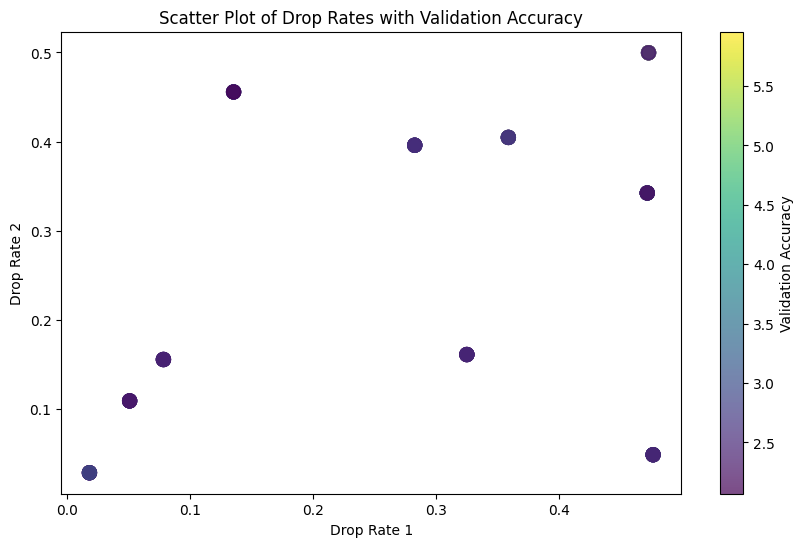

In [239]:
#log_df = pd.read_excel('regression\\Wine Quality_log.xlsx')

df = log_df[(log_df['drop_mode'] == 'postact') ]
#df = df[df.index % 5 == 0]
#df = df[(df['validation_accuracy'] < 0.6) ]
# Create scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(x=df['drop_rate1'], y=df['drop_rate2'], 
                      c=df['validation_accuracy'], cmap='viridis', s=100, alpha=0.7)

# Add color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Validation Accuracy')

# Add labels and title
plt.xlabel('Drop Rate 1')
plt.ylabel('Drop Rate 2')
plt.title('Scatter Plot of Drop Rates with Validation Accuracy')

# Show plot
plt.show()

In [146]:
filtered_df = df[df.index % 5 == 0]


,drop_rate1,drop_rate2,drop_mode,scale,validation_accuracy,test_accuracy
0,NaN,NaN,kan,NaN,0.261078,0.245215
1,NaN,NaN,kan,NaN,0.243114,0.270335
2,NaN,NaN,kan,NaN,0.245509,0.246411
3,NaN,NaN,kan,NaN,0.252695,0.266746
4,NaN,NaN,kan,NaN,0.256287,0.242823
...,...,...,...,...,...,...
60,0.238296,0.384427,postspline,0.0,0.180838,0.161483
61,0.238296,0.384427,postact,1.0,0.270659,0.271531
62,0.238296,0.384427,postact,0.0,0.134132,0.135167
63,0.238296,0.384427,dropout,1.0,0.194012,0.188995


In [143]:
filtered_df

,drop_rate1,drop_rate2,drop_mode,scale,validation_accuracy,test_accuracy
5,0.439603,0.161560,postspline,True,0.776803,0.767254
35,0.323032,0.330047,postspline,True,0.609769,0.654142
65,0.086748,0.472736,postspline,True,0.569506,0.586141
95,0.390608,0.081459,postspline,True,0.572698,0.586460
125,0.125249,0.000520,postspline,True,0.842592,0.824552
155,0.170939,0.129900,postspline,True,0.578990,0.591726
185,0.074843,0.289839,postspline,True,0.559773,0.597796
215,0.373512,0.029726,postspline,True,0.576287,0.615463
245,0.139663,0.404042,postspline,True,0.586521,0.600100
275,0.352422,0.168027,postspline,True,0.564419,0.583708


In [244]:
# Group by the combination of 'drop_rate1', 'drop_rate2', 'drop_mode', and 'scale'
grouped = log_df.groupby(['drop_rate1', 'drop_rate2', 'drop_mode', 'scale'])[['validation_accuracy', 'test_accuracy']].mean().reset_index()

# Calculate the mean of 'validation_accuracy' and 'test_accuracy'
grouped['mean_accuracy'] = (grouped['validation_accuracy'] + grouped['test_accuracy']) / 2

# Rank by the mean accuracy
grouped['rank'] = grouped['validation_accuracy'].rank(ascending=True, method='min')

# Sort by rank
grouped = grouped.sort_values(by='rank')

# Print the resulting DataFrame
print(grouped.head(70))

    drop_rate1  drop_rate2   drop_mode  scale  validation_accuracy  \
27    0.282661    0.395782     postact   True             2.233835   
33    0.325089    0.160819     postact   True             2.316588   
57    0.476726    0.048339     postact   True             2.340362   
13    0.078106    0.155242     dropout   True             2.366316   
39    0.358921    0.404559     postact   True             2.370057   
55    0.476726    0.048339     dropout   True             2.390573   
45    0.471979    0.342207     postact   True             2.391093   
7     0.050561    0.108781     dropout   True             2.400890   
8     0.050561    0.108781     postact  False             2.442271   
14    0.078106    0.155242     postact  False             2.449292   
15    0.078106    0.155242     postact   True             2.461778   
42    0.471979    0.342207     dropout  False             2.480934   
31    0.325089    0.160819     dropout   True             2.484357   
21    0.135197    0.

In [195]:
model = DropKAN(seed=j,width=[X_train.shape[1], 10, 1], grid=3, k=3, sb_trainable=False, 
                                        symbolic_enabled=False, drop_rate=[drop_rate1, drop_rate2], drop_mode=drop_mode, drop_scale=scale, neuron_fun=['sum', 'sum'])
   

In [246]:
log_df

,drop_rate1,drop_rate2,drop_mode,scale,validation_accuracy,test_accuracy
0,0.000000,0.000000,kan,None,2.868985,3.671066
1,0.000000,0.000000,kan,None,3.000000,3.713175
2,0.000000,0.000000,kan,None,2.418772,2.650319
3,0.000000,0.000000,kan,None,2.204382,2.890092
4,0.000000,0.000000,kan,None,2.999928,3.675426
...,...,...,...,...,...,...
300,0.282661,0.395782,dropout,False,2.763257,3.184225
301,0.282661,0.395782,dropout,False,2.426238,2.652259
302,0.282661,0.395782,dropout,False,2.480430,2.856474
303,0.282661,0.395782,dropout,False,2.114252,2.584464
